In [ ]:
import pandas as pd

# Load the first dataset
try:
    df1 = pd.read_csv('/content/data/nberces5818v1_n2012.csv')
    print("Successfully loaded '/content/data/nberces5818v1_n2012.csv'")
    display(df1.head())
except FileNotFoundError:
    print("Error: '/content/data/nberces5818v1_n2012.csv' not found. Please ensure the file is in the correct path.")

# Load the second dataset
try:
    # Trying to read as a text file first to inspect structure
    with open('/content/data/EC0731SR12.dat', 'r') as f:
        print("\nFirst few lines of '/content/data/EC0731SR12.dat':")
        for i in range(5):
            print(f.readline().strip())
    # You might need to adjust the separator or parsing method after inspecting the file
    df2 = pd.read_csv('/content/data/EC0731SR12.dat', sep='|', on_bad_lines='skip') # Assuming pipe-separated for .dat file
    print("\nSuccessfully loaded '/content/data/EC0731SR12.dat'")
    display(df2.head())
except FileNotFoundError:
    print("Error: '/content/data/EC0731SR12.dat' not found. Please ensure the file is in the correct path.")
except Exception as e:
    print(f"An error occurred while loading '/content/data/EC0731SR12.dat': {e}")

: 

In [ ]:
df1_2007 = df1[df1['year'] == 2007]
display(df1_2007.head())

,naics,year,emp,pay,prode,prodh,prodw,vship,matcost,vadd,...,equip,plant,piship,pimat,piinv,pien,dtfp5,tfp5,dtfp4,tfp4
49,311111,2007,16.9,793.6,13.0,27.9,552.8,14504.6,6984.4,7561.2,...,3180.1,1221.1,0.780,0.722,0.921,0.964,-0.033,1.033,-0.033,1.034
110,311119,2007,29.3,1182.6,18.0,36.9,624.2,24669.3,18465.3,6312.9,...,4168.6,2307.7,0.671,0.693,0.918,1.108,-0.101,1.120,-0.101,1.120
171,311211,2007,10.3,480.8,7.5,17.4,305.2,9812.5,7228.1,2664.7,...,2264.9,1402.3,0.807,0.736,0.914,0.907,0.030,0.883,0.029,0.883
232,311212,2007,3.8,150.9,3.1,6.5,108.1,2827.3,2156.0,786.0,...,672.6,311.9,0.873,0.737,0.915,0.903,0.090,0.824,0.089,0.823
293,311213,2007,1.2,48.0,0.8,1.4,30.8,789.3,600.0,195.1,...,418.4,251.3,0.769,0.736,0.913,0.931,0.123,0.866,0.155,0.881


In [ ]:
columns_to_drop = ['GEOTYPE', 'GEOTYPE_MEANING', 'GEO_ID', 'GEOGRAPHY', 'PROGRAM', 'PROGRAM_MEANING', 'SECTOR']
df2_dropped = df2.drop(columns=columns_to_drop)
display(df2_dropped.head())

,ST,SECTOR_MEANING,NAICS2007,NAICS2007_MEANING,CONCENFI,CONCENFI_MEANING,FOOTID,FOOTID_MEANING,YEAR,YEAR_MEANING,COMPANY,COMPANY_F,RCPTOT,RCPTOT_F,CCORCPPCT,CCORCPPCT_F,VSHERFI,VSHERFI_F
0,0,Manufacturing,31171,Seafood product preparation and packaging,856,4 largest companies,NaN,NaN,2007,Reference year 2007,0,X,0,X,26.2,NaN,0.0,X
1,0,Manufacturing,31171,Seafood product preparation and packaging,857,8 largest companies,NaN,NaN,2007,Reference year 2007,0,X,0,X,38.2,NaN,0.0,X
2,0,Manufacturing,31171,Seafood product preparation and packaging,858,20 largest companies,NaN,NaN,2007,Reference year 2007,0,X,0,X,58.2,NaN,0.0,X
3,0,Manufacturing,31171,Seafood product preparation and packaging,859,50 largest companies,NaN,NaN,2007,Reference year 2007,0,X,0,X,75.6,NaN,287.1,NaN
4,0,Manufacturing,311711,Seafood canning,4,All companies,NaN,NaN,2007,Reference year 2007,83,NaN,1032130,NaN,100.0,NaN,0.0,X


In [ ]:
df2_filtered = df2_dropped[df2_dropped['CONCENFI'] == 859]
display(df2_filtered.head())

,ST,SECTOR_MEANING,NAICS2007,NAICS2007_MEANING,CONCENFI,CONCENFI_MEANING,FOOTID,FOOTID_MEANING,YEAR,YEAR_MEANING,COMPANY,COMPANY_F,RCPTOT,RCPTOT_F,CCORCPPCT,CCORCPPCT_F,VSHERFI,VSHERFI_F
3,0,Manufacturing,31171,Seafood product preparation and packaging,859,50 largest companies,NaN,NaN,2007,Reference year 2007,0,X,0,X,75.6,NaN,287.1,NaN
8,0,Manufacturing,311711,Seafood canning,859,50 largest companies,NaN,NaN,2007,Reference year 2007,0,X,0,X,99.2,NaN,1254.9,NaN
13,0,Manufacturing,311712,Fresh and frozen seafood processing,859,50 largest companies,NaN,NaN,2007,Reference year 2007,0,X,0,X,76.6,NaN,319.0,NaN
18,0,Manufacturing,3118,Bakeries and tortilla manufacturing,859,50 largest companies,NaN,NaN,2007,Reference year 2007,0,X,0,X,65.3,NaN,210.0,NaN
23,0,Manufacturing,31181,Bread and bakery product manufacturing,859,50 largest companies,NaN,NaN,2007,Reference year 2007,0,X,0,X,65.1,NaN,295.1,NaN


In [ ]:
# Rename 'NAICS2007' in df2_filtered to 'naics' for merging
df2_filtered_renamed = df2_filtered.rename(columns={'NAICS2007': 'naics', 'NAICS2007_MEANING': 'naics_meaning'})

# Merge df2_filtered_renamed into df1_2007 on the 'naics' column, including 'naics_meaning' and 'VSHERFI'
df_merged_filtered = pd.merge(df1_2007, df2_filtered_renamed[['naics', 'naics_meaning', 'VSHERFI']], on='naics', how='left')

display(df_merged_filtered.head())

,naics,year,emp,pay,prode,prodh,prodw,vship,matcost,vadd,...,piship,pimat,piinv,pien,dtfp5,tfp5,dtfp4,tfp4,naics_meaning,VSHERFI
0,311111,2007,16.9,793.6,13.0,27.9,552.8,14504.6,6984.4,7561.2,...,0.780,0.722,0.921,0.964,-0.033,1.033,-0.033,1.034,Dog and cat food manufacturing,2325.1
1,311119,2007,29.3,1182.6,18.0,36.9,624.2,24669.3,18465.3,6312.9,...,0.671,0.693,0.918,1.108,-0.101,1.120,-0.101,1.120,Other animal food manufacturing,285.4
2,311211,2007,10.3,480.8,7.5,17.4,305.2,9812.5,7228.1,2664.7,...,0.807,0.736,0.914,0.907,0.030,0.883,0.029,0.883,Flour milling,831.3
3,311212,2007,3.8,150.9,3.1,6.5,108.1,2827.3,2156.0,786.0,...,0.873,0.737,0.915,0.903,0.090,0.824,0.089,0.823,Rice milling,776.4
4,311213,2007,1.2,48.0,0.8,1.4,30.8,789.3,600.0,195.1,...,0.769,0.736,0.913,0.931,0.123,0.866,0.155,0.881,Malt manufacturing,0.0


In [ ]:
df_merged_filtered.shape

(364, 26)

In [ ]:
non_na_non_zero_vskerfi_count = df_merged_filtered['VSHERFI'].notna() & (df_merged_filtered['VSHERFI'] != 0)
print(f"Number of rows with non-NA and non-zero VSHERFI values: {non_na_non_zero_vskerfi_count.sum()}")

Number of rows with non-NA and non-zero VSHERFI values: 283


In [ ]:
# Drop rows where VSHERFI is NA or 0
df_cleaned = df_merged_filtered.dropna(subset=['VSHERFI'])
df_cleaned = df_cleaned[df_cleaned['VSHERFI'] != 0]

# Rename the 'VSHERFI' column to 'HHI'
df_cleaned = df_cleaned.rename(columns={'VSHERFI': 'HHI'})

display(df_cleaned.head())

,naics,year,emp,pay,prode,prodh,prodw,vship,matcost,vadd,...,piship,pimat,piinv,pien,dtfp5,tfp5,dtfp4,tfp4,naics_meaning,HHI
0,311111,2007,16.9,793.6,13.0,27.9,552.8,14504.6,6984.4,7561.2,...,0.780,0.722,0.921,0.964,-0.033,1.033,-0.033,1.034,Dog and cat food manufacturing,2325.1
1,311119,2007,29.3,1182.6,18.0,36.9,624.2,24669.3,18465.3,6312.9,...,0.671,0.693,0.918,1.108,-0.101,1.120,-0.101,1.120,Other animal food manufacturing,285.4
2,311211,2007,10.3,480.8,7.5,17.4,305.2,9812.5,7228.1,2664.7,...,0.807,0.736,0.914,0.907,0.030,0.883,0.029,0.883,Flour milling,831.3
3,311212,2007,3.8,150.9,3.1,6.5,108.1,2827.3,2156.0,786.0,...,0.873,0.737,0.915,0.903,0.090,0.824,0.089,0.823,Rice milling,776.4
5,311221,2007,8.2,506.2,5.2,11.4,300.0,12034.2,6862.0,5212.4,...,0.833,0.706,0.915,0.895,0.093,1.047,0.094,1.052,Wet corn milling,2338.2


In [ ]:
# Calculate the 'markup' variable
df_cleaned['markup'] = df_cleaned['vship'] / (df_cleaned['matcost'] + df_cleaned['energy'] + df_cleaned['prodw'])

# Display the first few rows with the new 'markup' column
display(df_cleaned[['vship', 'matcost', 'energy', 'prodw', 'markup']].head())

,vship,matcost,energy,prodw,markup
0,14504.6,6984.4,197.5,552.8,1.875263
1,24669.3,18465.3,365.2,624.2,1.268038
2,9812.5,7228.1,201.2,305.2,1.268666
3,2827.3,2156.0,60.6,108.1,1.216200
5,12034.2,6862.0,1100.2,300.0,1.456537


In [ ]:
df_sorted_asc = df_cleaned.sort_values(by='markup', ascending=True)
df_sorted_desc = df_cleaned.sort_values(by='markup', ascending=False)

In [ ]:
df_lowest_markup = df_sorted_asc.head(10)
df_highest_markup = df_sorted_desc.head(10)

display(df_lowest_markup[['naics_meaning', 'markup']].head())
display(df_highest_markup[['naics_meaning', 'markup']].head())

,naics_meaning,markup
24,Animal (except poultry) slaughtering,1.097441
20,Creamery butter manufacturing,1.132630
175,Secondary smelting and alloying of aluminum,1.137285
21,Cheese manufacturing,1.152083
76,Softwood veneer and plywood manufacturing,1.161252


,naics_meaning,markup
122,Pharmaceutical preparation manufacturing,3.665205
45,Ice manufacturing,3.136822
124,Biological product (except diagnostic) manufac...,2.976202
272,Semiconductor and related device manufacturing,2.967177
127,Soap and other detergent manufacturing,2.800398


In [ ]:
df_lowest_markup_table = df_lowest_markup[['naics_meaning', 'markup']]
df_highest_markup_table = df_highest_markup[['naics_meaning', 'markup']]

display(df_lowest_markup_table.head())
display(df_highest_markup_table.head())

,naics_meaning,markup
24,Animal (except poultry) slaughtering,1.097441
20,Creamery butter manufacturing,1.132630
175,Secondary smelting and alloying of aluminum,1.137285
21,Cheese manufacturing,1.152083
76,Softwood veneer and plywood manufacturing,1.161252


,naics_meaning,markup
122,Pharmaceutical preparation manufacturing,3.665205
45,Ice manufacturing,3.136822
124,Biological product (except diagnostic) manufac...,2.976202
272,Semiconductor and related device manufacturing,2.967177
127,Soap and other detergent manufacturing,2.800398


In [ ]:
df_lowest_markup_table = df_lowest_markup_table.reset_index(drop=True)
df_lowest_markup_table['Rank'] = df_lowest_markup_table.index + 1
df_lowest_markup_table = df_lowest_markup_table[['Rank', 'naics_meaning', 'markup']]

df_highest_markup_table = df_highest_markup_table.reset_index(drop=True)
df_highest_markup_table['Rank'] = df_highest_markup_table.index + 1
df_highest_markup_table = df_highest_markup_table[['Rank', 'naics_meaning', 'markup']]

display(df_lowest_markup_table.head())
display(df_highest_markup_table.head())

,Rank,naics_meaning,markup
0,1,Animal (except poultry) slaughtering,1.097441
1,2,Creamery butter manufacturing,1.132630
2,3,Secondary smelting and alloying of aluminum,1.137285
3,4,Cheese manufacturing,1.152083
4,5,Softwood veneer and plywood manufacturing,1.161252


,Rank,naics_meaning,markup
0,1,Pharmaceutical preparation manufacturing,3.665205
1,2,Ice manufacturing,3.136822
2,3,Biological product (except diagnostic) manufac...,2.976202
3,4,Semiconductor and related device manufacturing,2.967177
4,5,Soap and other detergent manufacturing,2.800398


In [ ]:
latex_lowest_markup = df_lowest_markup_table.to_latex(index=False, float_format="%.4f")
latex_highest_markup = df_highest_markup_table.to_latex(index=False, float_format="%.4f")
print("LaTeX table for lowest markups:")
print(latex_lowest_markup)
print("\nLaTeX table for highest markups:")
print(latex_highest_markup)

LaTeX table for lowest markups:
\begin{tabular}{rlr}
\toprule
Rank & naics_meaning & markup \\
\midrule
1 & Animal (except poultry) slaughtering & 1.0974 \\
2 & Creamery butter manufacturing & 1.1326 \\
3 & Secondary smelting and alloying of aluminum & 1.1373 \\
4 & Cheese manufacturing & 1.1521 \\
5 & Softwood veneer and plywood manufacturing & 1.1613 \\
6 & Aluminum sheet, plate, and foil manufacturing & 1.1703 \\
7 & Heavy duty truck manufacturing & 1.1746 \\
8 & Petroleum refineries & 1.1776 \\
9 & Fats and oils refining and blending & 1.1890 \\
10 & All other basic organic chemical manufacturing & 1.1904 \\
\bottomrule
\end{tabular}


LaTeX table for highest markups:
\begin{tabular}{rlr}
\toprule
Rank & naics_meaning & markup \\
\midrule
1 & Pharmaceutical preparation manufacturing & 3.6652 \\
2 & Ice manufacturing & 3.1368 \\
3 & Biological product (except diagnostic) manufacturing & 2.9762 \\
4 & Semiconductor and related device manufacturing & 2.9672 \\
5 & Soap and other deter

In [ ]:
import numpy as np

df_cleaned['log_markup'] = np.log(df_cleaned['markup'])
df_cleaned['log_HHI'] = np.log(df_cleaned['HHI'])

display(df_cleaned[['markup', 'log_markup', 'HHI', 'log_HHI']].head())

,markup,log_markup,HHI,log_HHI
0,1.875263,0.628749,2325.1,7.751518
1,1.268038,0.237471,285.4,5.653892
2,1.268666,0.237966,831.3,6.722991
3,1.216200,0.195731,776.4,6.654668
5,1.456537,0.376062,2338.2,7.757137


In [ ]:
import statsmodels.api as sm

y = df_cleaned['log_markup']
X = df_cleaned['log_HHI']
X = sm.add_constant(X)

In [ ]:
model = sm.OLS(y, X).fit()

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             log_markup   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                  0.005453
Date:                Sun, 12 Oct 2025   Prob (F-statistic):              0.941
Time:                        17:14:22   Log-Likelihood:                 55.696
No. Observations:                 283   AIC:                            -107.4
Df Residuals:                     281   BIC:                            -100.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5057      0.067      7.516      0.0

In [ ]:
print(f"The coefficient of log_HHI is: {model.params['log_HHI']:.4f}")

The coefficient of log_HHI is: -0.0008


In [ ]:
log_hhi_coefficient = model.params['log_HHI']
print(f"The coefficient of log_HHI from the regression is: {log_hhi_coefficient:.4f}")

The coefficient of log_HHI from the regression is: -0.0008


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_cleaned['predicted_log_markup'] = model.predict(X)
display(df_cleaned[['log_markup', 'predicted_log_markup', 'log_HHI']].head())

,log_markup,predicted_log_markup,log_HHI
0,0.628749,0.499551,7.751518
1,0.237471,0.501212,5.653892
2,0.237966,0.500366,6.722991
3,0.195731,0.500420,6.654668
5,0.376062,0.499547,7.757137


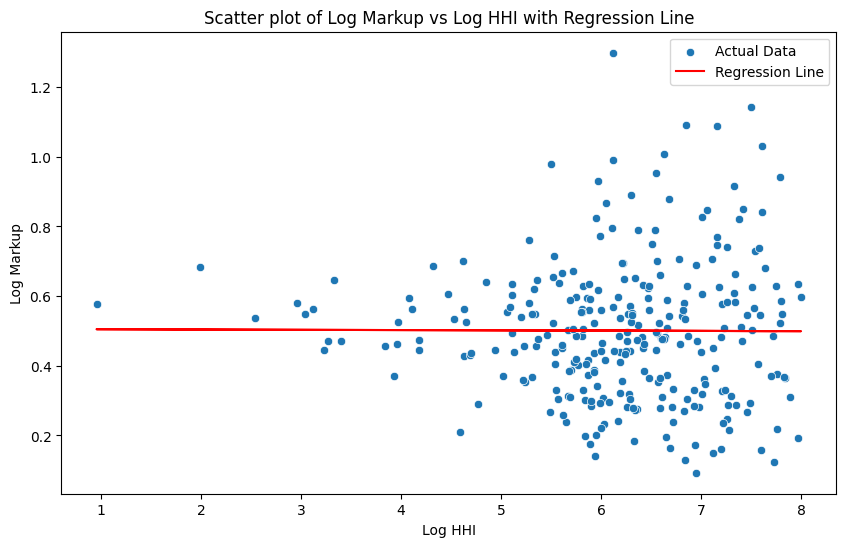

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='log_HHI', y='log_markup', label='Actual Data')
plt.plot(df_cleaned['log_HHI'], df_cleaned['predicted_log_markup'], color='red', label='Regression Line')
plt.xlabel('Log HHI')
plt.ylabel('Log Markup')
plt.title('Scatter plot of Log Markup vs Log HHI with Regression Line')
plt.legend()
plt.show()

# Task
Solve the system of equations $\log(\text{markup}) = \log\left(\frac{\theta}{\theta-1}\right) + \log\left(\frac{E/F}{E/F-1}\right)$ and $\log(\text{HHI}) = \log(\theta) - \log\left(E/F +(1-\theta)\right)$ for $\theta$ and $E/F$ for each row of the dataframe `df_cleaned`, where `log_markup` and `log_HHI` are given in the dataframe. Store the results in new columns named `theta` and `ef_ratio`.

## Define a function to solve for a single row

### Subtask:
Define a function that takes a row of the DataFrame as input, extracts the `log_markup` and `log_HHI` values, and uses `scipy.optimize.root` to solve the system of equations for `theta` and `E/F`. This function should handle potential solver failures and return the solved values or NaNs if the solver fails or finds invalid results.


**Reasoning**:
Define a function to solve the system of equations for theta and E/F for a given row, handling potential solver failures and invalid solutions.



In [ ]:
from scipy.optimize import root
import numpy as np

def solve_theta_ef(row):
    """
    Solves the system of equations for theta and E/F for a given row of the DataFrame.

    Args:
        row: A Pandas Series representing a row of the DataFrame with 'log_markup' and 'log_HHI'.

    Returns:
        A tuple (theta, ef_ratio) containing the solved values, or (np.nan, np.nan) if the
        solver fails or finds invalid results.
    """
    log_markup_val = row['log_markup']
    log_HHI_val = row['log_HHI']

    # System of equations to solve for theta and E/F.
    def equations_system_local(vars):
        theta, ef_ratio = vars
        # Use a small epsilon to avoid log of zero or negative numbers
        eq1 = np.log(np.maximum(theta / (theta - 1), 1e-9)) + np.log(np.maximum(ef_ratio / (ef_ratio - 1), 1e-9)) - log_markup_val
        eq2 = np.log(np.maximum(theta, 1e-9)) - np.log(np.maximum(ef_ratio + (1 - theta), 1e-9)) - log_HHI_val
        return [eq1, eq2]

    # Initial guess for theta and E/F (ef_ratio)
    initial_guess = [1.5, 1.5]

    try:
        # Solve the system of equations using root with the 'lm' method
        solution = root(equations_system_local, initial_guess, method='lm')

        # Check if the solver was successful and the values are within the domain
        if solution.success:
            theta_solved, ef_ratio_solved = solution.x

            is_theta_valid = theta_solved > 1
            is_ef_ratio_valid = ef_ratio_solved > 1
            is_eq2_denom_valid = (ef_ratio_solved + (1 - theta_solved)) > 0

            if is_theta_valid and is_ef_ratio_valid and is_eq2_denom_valid:
                return (theta_solved, ef_ratio_solved)
            else:
                # Solved values are outside the domain
                return (np.nan, np.nan)
        else:
            # Solver failed
            return (np.nan, np.nan)
    except Exception as e:
        # Handle potential errors during solving
        print(f"Error solving for row: {e}")
        return (np.nan, np.nan)

## Apply the function to each row

### Subtask:
Apply the solving function to each row of the `df_cleaned` DataFrame to create new columns for the solved `theta` and `E/F` values.


**Reasoning**:
Apply the solving function to each row of the DataFrame and store the results in new columns.



In [ ]:
# Apply the solve_theta_ef function to each row
results = df_cleaned.apply(solve_theta_ef, axis=1)

# Expand the results (Series of tuples) into two new columns
df_cleaned['theta'] = [x[0] for x in results]
df_cleaned['ef_ratio'] = [x[1] for x in results]

# Display the first and last few rows of the updated DataFrame
display(df_cleaned.head())
display(df_cleaned.tail())

,naics,year,emp,pay,prode,prodh,prodw,vship,matcost,vadd,...,dtfp4,tfp4,naics_meaning,HHI,markup,log_markup,log_HHI,predicted_log_markup,ef_ratio,theta
0,311111,2007,16.9,793.6,13.0,27.9,552.8,14504.6,6984.4,7561.2,...,-0.033,1.034,Dog and cat food manufacturing,2325.1,1.875263,0.628749,7.751518,0.499551,3.285667,4.283825
1,311119,2007,29.3,1182.6,18.0,36.9,624.2,24669.3,18465.3,6312.9,...,-0.101,1.120,Other animal food manufacturing,285.4,1.268038,0.237471,5.653892,0.501212,8.476247,9.443160
2,311211,2007,10.3,480.8,7.5,17.4,305.2,9812.5,7228.1,2664.7,...,0.029,0.883,Flour milling,831.3,1.268666,0.237966,6.722991,0.500366,8.449185,9.437832
3,311212,2007,3.8,150.9,3.1,6.5,108.1,2827.3,2156.0,786.0,...,0.089,0.823,Rice milling,776.4,1.216200,0.195731,6.654668,0.500420,10.257235,11.242755
5,311221,2007,8.2,506.2,5.2,11.4,300.0,12034.2,6862.0,5212.4,...,0.094,1.052,Wet corn milling,2338.2,1.456537,0.376062,7.757137,0.499547,5.381917,6.379189


,naics,year,emp,pay,prode,prodh,prodw,vship,matcost,vadd,...,dtfp4,tfp4,naics_meaning,HHI,markup,log_markup,log_HHI,predicted_log_markup,ef_ratio,theta
359,339992,2007,13.3,504.6,10.3,20.1,331.3,1795.8,665.0,1154.9,...,0.008,0.948,Musical instrument manufacturing,404.6,1.751317,0.560368,6.002899,0.500936,3.666184,4.654679
360,339993,2007,5.5,217.5,3.7,7.6,109.4,958.3,348.9,604.8,...,0.063,1.183,"Fastener, button, needle, and pin manufacturing",1041.7,1.994796,0.690542,6.948609,0.500187,3.011748,4.007901
361,339994,2007,11.3,396.6,8.4,16.2,235.2,2315.9,1117.8,1224.5,...,0.002,0.834,"Broom, brush, and mop manufacturing",377.1,1.686622,0.522727,5.932510,0.500992,3.917664,4.904658
362,339995,2007,4.3,159.1,3.5,6.9,113.0,817.2,346.6,470.4,...,-0.122,1.193,Burial casket manufacturing,1979.1,1.724778,0.545099,7.590397,0.499679,3.760347,4.757943
363,339999,2007,79.4,3010.1,52.0,99.1,1471.5,16133.9,6662.6,9543.9,...,-0.020,1.181,All other miscellaneous manufacturing,274.5,1.949999,0.667829,5.614951,0.501243,3.110339,4.095420


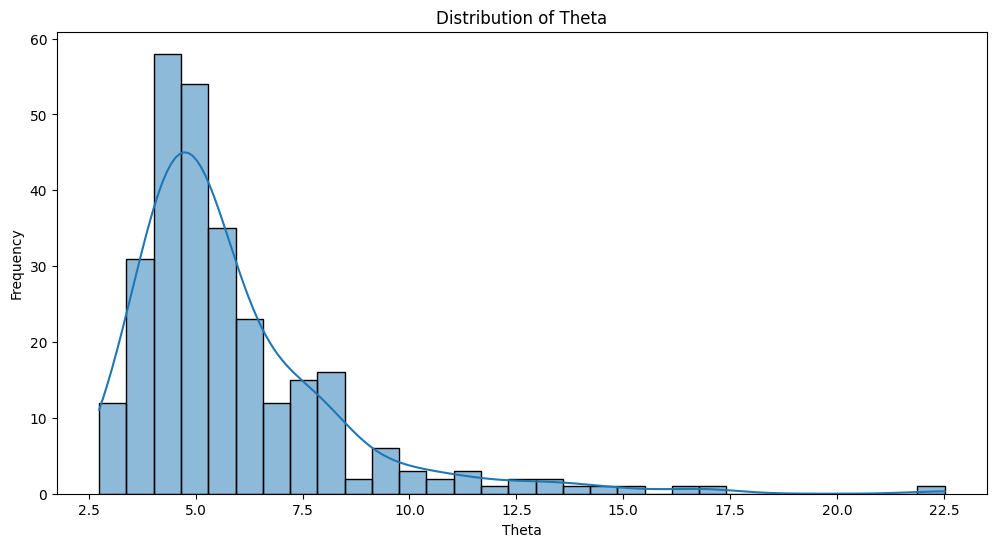

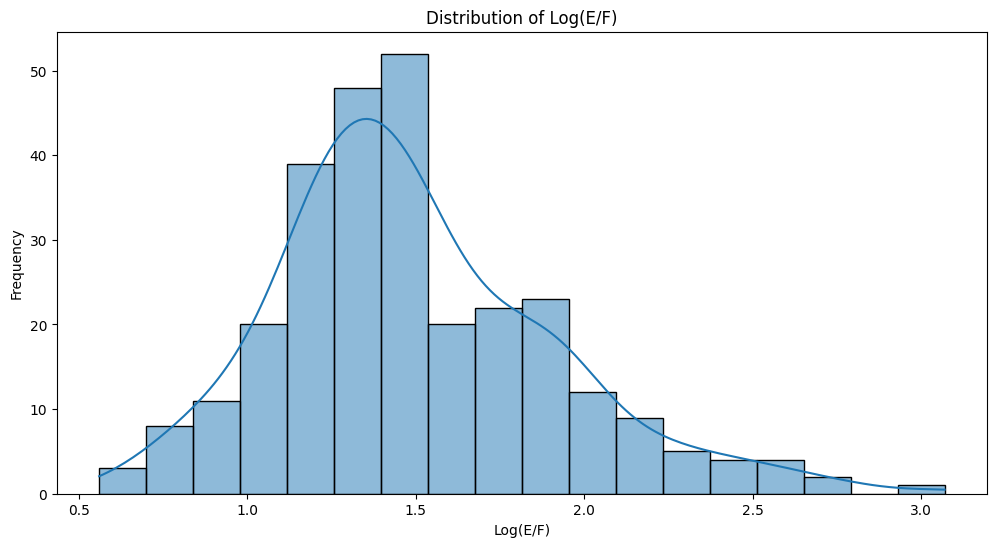

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate log(ef_ratio)
df_cleaned['log_ef_ratio'] = np.log(df_cleaned['ef_ratio'])

# Plot histogram for theta
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['theta'].dropna(), kde=True)
plt.xlabel('Theta')
plt.ylabel('Frequency')
plt.title('Distribution of Theta')
plt.show()

# Plot histogram for log(ef_ratio)
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['log_ef_ratio'].dropna(), kde=True)
plt.xlabel('Log(E/F)')
plt.ylabel('Frequency')
plt.title('Distribution of Log(E/F)')
plt.show()

In [ ]:
# Calculate the variance of log_markup (already calculated, but recalculating for clarity)
variance_log_markup = df_cleaned['log_markup'].var()
print(f"Variance of log_markup: {variance_log_markup:.4f}")

# Calculate the terms for the other variances and covariance
df_cleaned['log_theta_term'] = np.log(df_cleaned['theta'] / (df_cleaned['theta'] - 1))
df_cleaned['log_ef_ratio_term'] = np.log(df_cleaned['ef_ratio'] / (df_cleaned['ef_ratio'] - 1))

# Calculate the variance of log_theta_term and log_ef_ratio_term
variance_log_theta_term = df_cleaned['log_theta_term'].var()
variance_log_ef_ratio_term = df_cleaned['log_ef_ratio_term'].var()
print(f"Variance of log(theta/(theta-1)): {variance_log_theta_term:.4f}")
print(f"Variance of log(E/F/(E/F-1)): {variance_log_ef_ratio_term:.4f}")

# Calculate the covariance of log_theta_term and log_ef_ratio_term
covariance_terms = df_cleaned['log_theta_term'].cov(df_cleaned['log_ef_ratio_term'])
print(f"Covariance of log(theta/(theta-1)) and log(E/F/(E/F-1)): {covariance_terms:.4f}")

# Calculate the sum of variances and covariance
sum_of_terms = variance_log_theta_term + variance_log_ef_ratio_term + 2 * covariance_terms

print(f"\nSum of variances and 2*covariance: {sum_of_terms:.4f}")

# Compare the variance of log_markup to the sum of terms to make sure correct decomp
print(f"Comparison: Variance of log_markup ({variance_log_markup:.4f}) vs Sum of terms ({sum_of_terms:.4f})")

Variance of log_markup: 0.0396
Variance of log(theta/(theta-1)): 0.0053
Variance of log(E/F/(E/F-1)): 0.0161
Covariance of log(theta/(theta-1)) and log(E/F/(E/F-1)): 0.0091

Sum of variances and 2*covariance: 0.0396
Comparison: Variance of log_markup (0.0396) vs Sum of terms (0.0396)


In [ ]:
# Calculate the share of variance for each term
share_theta_variance = variance_log_theta_term / variance_log_markup
share_ef_ratio_variance = variance_log_ef_ratio_term / variance_log_markup
share_covariance = (2 * covariance_terms) / variance_log_markup

print("Share of Variance of Log Markup for Each Term:")
print(f"Variance of log(theta/(theta-1)): {share_theta_variance:.4f}")
print(f"Variance of log(E/F/(E/F-1)): {share_ef_ratio_variance:.4f}")
print(f"2 * Covariance of log(theta/(theta-1)) and log(E/F/(E/F-1)): {share_covariance:.4f}")

# Verify that the shares sum to approximately 1
total_share = share_theta_variance + share_ef_ratio_variance + share_covariance
print(f"\nTotal Share: {total_share:.4f}")

Share of Variance of Log Markup for Each Term:
Variance of log(theta/(theta-1)): 0.1345
Variance of log(E/F/(E/F-1)): 0.4061
2 * Covariance of log(theta/(theta-1)) and log(E/F/(E/F-1)): 0.4594

Total Share: 1.0000


# Task
Construct `log_markup_fix_theta` and `log_HHI_fix_theta` variables by fixing theta to 3 in the definitions of `log_markup` and `log_HHI` respectively. Similarly, construct `log_markup_fix_ef` and `log_HHI_fix_ef` by fixing E/F to 50. Then, run a regression of `log_markup_fix_theta` on `log_HHI_fix_theta` and a regression of `log_markup_fix_ef` on `log_HHI_fix_ef`, reporting the coefficients as elasticities.

## Define functions with fixed parameters

### Subtask:
Create Python functions that represent the equations for `log_markup` and `log_HHI`, but with either `theta` or `E/F` fixed to a specific value (3 for theta, 50 for E/F). These functions should take the other variable and return the calculated log values.


**Reasoning**:
Define the functions to calculate log_markup and log_HHI with either theta or E/F fixed.



In [ ]:
import numpy as np

epsilon = 1e-9 # Small value to avoid log of non-positive numbers

def log_markup_fixed_theta(ef_ratio, fixed_theta=3):
    """
    Calculates log_markup with theta fixed.
    """
    term1 = np.log(np.maximum(fixed_theta / (fixed_theta - 1), epsilon))
    term2 = np.log(np.maximum(ef_ratio / (ef_ratio - 1), epsilon))
    return term1 + term2

def log_HHI_fixed_theta(ef_ratio, fixed_theta=3):
    """
    Calculates log_HHI with theta fixed.
    """
    term1 = np.log(np.maximum(fixed_theta, epsilon))
    term2 = np.log(np.maximum(ef_ratio + (1 - fixed_theta), epsilon))
    return term1 - term2

def log_markup_fixed_ef(theta, fixed_ef=50):
    """
    Calculates log_markup with E/F fixed.
    """
    term1 = np.log(np.maximum(theta / (theta - 1), epsilon))
    term2 = np.log(np.maximum(fixed_ef / (fixed_ef - 1), epsilon))
    return term1 + term2

def log_HHI_fixed_ef(theta, fixed_ef=50):
    """
    Calculates log_HHI with E/F fixed.
    """
    term1 = np.log(np.maximum(theta, epsilon))
    term2 = np.log(np.maximum(fixed_ef + (1 - theta), epsilon))
    return term1 - term2

## Create new variables with fixed theta

### Subtask:
Apply the functions with `theta` fixed to 3 to the `df_cleaned` DataFrame to create `log_markup_fix_theta` and `log_HHI_fix_theta` columns.


**Reasoning**:
Apply the defined functions with fixed theta to the DataFrame to create the new columns and display the head of the updated DataFrame.



In [ ]:
# Apply the log_markup_fixed_theta function to the 'ef_ratio' column
df_cleaned['log_markup_fix_theta'] = df_cleaned['ef_ratio'].apply(log_markup_fixed_theta)

# Apply the log_HHI_fixed_theta function to the 'ef_ratio' column
df_cleaned['log_HHI_fix_theta'] = df_cleaned['ef_ratio'].apply(log_HHI_fixed_theta)

# Display the head of df_cleaned with the new columns
display(df_cleaned[['naics_meaning', 'ef_ratio', 'theta', 'log_markup_fix_theta', 'log_HHI_fix_theta']].head())

,naics_meaning,ef_ratio,theta,log_markup_fix_theta,log_HHI_fix_theta
0,Dog and cat food manufacturing,3.285667,4.283825,0.768377,0.847334
1,Other animal food manufacturing,8.476247,9.443160,0.531002,-0.769529
2,Flour milling,8.449185,9.437832,0.531430,-0.765342
3,Rice milling,10.257235,11.242755,0.508043,-1.012478
5,Wet corn milling,5.381917,6.379189,0.611023,-0.119830


## Run regression with fixed theta

### Subtask:
Perform an OLS regression of `log_markup_fix_theta` on `log_HHI_fix_theta` using `statsmodels`.


**Reasoning**:
Perform an OLS regression of log_markup_fix_theta on log_HHI_fix_theta using statsmodels.



In [ ]:
# Apply the log_markup_fixed_ef function to the 'theta' column
df_cleaned['log_markup_fix_ef'] = df_cleaned['theta'].apply(log_markup_fixed_ef)

# Apply the log_HHI_fixed_ef function to the 'theta' column
df_cleaned['log_HHI_fix_ef'] = df_cleaned['theta'].apply(log_HHI_fixed_ef)

# Display the head of df_cleaned with the new columns
display(df_cleaned[['naics_meaning', 'ef_ratio', 'theta', 'log_markup_fix_ef', 'log_HHI_fix_ef']].head())

,naics_meaning,ef_ratio,theta,log_markup_fix_ef,log_HHI_fix_ef
0,Dog and cat food manufacturing,3.285667,4.283825,0.286040,-2.389244
1,Other animal food manufacturing,8.476247,9.443160,0.132137,-1.481771
2,Flour milling,8.449185,9.437832,0.132204,-1.482464
3,Rice milling,10.257235,11.242755,0.113356,-1.263068
5,Wet corn milling,5.381917,6.379189,0.190706,-1.945159


In [ ]:
import statsmodels.api as sm

# Define the dependent variable
y = df_cleaned['log_markup_fix_theta']

# Define the independent variable and add a constant
X = df_cleaned['log_HHI_fix_theta']
X = sm.add_constant(X)

# Create and fit the OLS model
model_fixed_theta = sm.OLS(y, X).fit()

In [ ]:
# Define the dependent variable
y = df_cleaned['log_markup_fix_ef']

# Define the independent variable and add a constant
X = df_cleaned['log_HHI_fix_ef']
X = sm.add_constant(X)

# Create and fit the OLS model
model_fixed_ef = sm.OLS(y, X).fit()

In [ ]:
log_hhi_fixed_theta_elasticity = model_fixed_theta.params['log_HHI_fix_theta']
log_hhi_fixed_ef_elasticity = model_fixed_ef.params['log_HHI_fix_ef']

print(f"Elasticity of log(markup) with respect to log(HHI) (theta fixed at 3): {log_hhi_fixed_theta_elasticity:.4f}")
print(f"Elasticity of log(markup) with respect to log(HHI) (E/F fixed at 50): {log_hhi_fixed_ef_elasticity:.4f}")

Elasticity of log(markup) with respect to log(HHI) (theta fixed at 3): 0.0446
Elasticity of log(markup) with respect to log(HHI) (E/F fixed at 50): -0.1705


# Task
Define $\log(\text{markup\_nofixedcost}) = \log\left(\frac{\theta}{\theta-1}\right)$. Calculate the cost-weighted average of `log_markup` and `log_markup_nofixedcost` where cost is the sum of `matcost`, `energy`, and `prodw`. Then, calculate the difference between these two weighted averages to determine the potential fall in markups.

## Define log markup nofixedcost

### Subtask:
Create a new column in `df_cleaned` representing $\log\left(\frac{\theta}{\theta-1}\right).$


**Reasoning**:
Calculate the log of the ratio of theta to theta minus one and store it in a new column, handling potential division by zero or non-positive arguments to the logarithm.



In [ ]:
# Calculate the term theta / (theta - 1), handling potential division by zero or negative results
theta_ratio = df_cleaned['theta'] / (df_cleaned['theta'] - 1)

# Calculate the natural logarithm of the ratio, handling non-positive arguments
df_cleaned['log_markup_nofixedcost'] = np.log(np.maximum(theta_ratio, epsilon))

# Display the head of df_cleaned with the new column
display(df_cleaned[['naics_meaning', 'theta', 'log_markup', 'log_markup_nofixedcost']].head())

,naics_meaning,theta,log_markup,log_markup_nofixedcost
0,Dog and cat food manufacturing,4.283825,0.628749,0.265837
1,Other animal food manufacturing,9.443160,0.237471,0.111934
2,Flour milling,9.437832,0.237966,0.112001
3,Rice milling,11.242755,0.195731,0.093153
5,Wet corn milling,6.379189,0.376062,0.170503


## Calculate total cost

### Subtask:
Create a new column in `df_cleaned` representing the total cost (`matcost + energy + prodw`).


**Reasoning**:
Create a new column 'total_cost' by summing 'matcost', 'energy', and 'prodw', and display the first few rows.



In [ ]:
# Create a new column 'total_cost' by summing 'matcost', 'energy', and 'prodw'
df_cleaned['total_cost'] = df_cleaned['matcost'] + df_cleaned['energy'] + df_cleaned['prodw']

# Display the first few rows of df_cleaned including the new 'total_cost' column
display(df_cleaned[['naics_meaning', 'matcost', 'energy', 'prodw', 'total_cost']].head())

,naics_meaning,matcost,energy,prodw,total_cost
0,Dog and cat food manufacturing,6984.4,197.5,552.8,7734.7
1,Other animal food manufacturing,18465.3,365.2,624.2,19454.7
2,Flour milling,7228.1,201.2,305.2,7734.5
3,Rice milling,2156.0,60.6,108.1,2324.7
5,Wet corn milling,6862.0,1100.2,300.0,8262.2


## Calculate cost-weighted average of log markup

### Subtask:
Compute the weighted average of the `log_markup` column using the total cost as weights.


**Reasoning**:
Calculate the cost-weighted average of log_markup by summing the product of log_markup and total_cost and dividing by the sum of total_cost.



In [ ]:
total_cost_sum = df_cleaned['total_cost'].sum()
# Calculate cost-weighted average of markup in levels
markup_times_total_cost = (np.exp(df_cleaned['log_markup']) * df_cleaned['total_cost']).sum()
cost_weighted_avg_markup = markup_times_total_cost / total_cost_sum

print(f"Cost-weighted average of markup: {cost_weighted_avg_markup:.4f}")

Cost-weighted average of markup: 1.5393


## Calculate cost-weighted average of log markup nofixedcost

### Subtask:
Compute the weighted average of the `log_markup_nofixedcost` column using the total cost as weights.


**Reasoning**:
Compute the cost-weighted average of the log_markup_nofixedcost column by multiplying it with the total_cost and dividing by the sum of the total_cost.



In [ ]:
# Calculate the sum of the product of the markup_nofixedcost column (in levels) and the total_cost column
markup_nofixedcost_times_total_cost = (np.exp(df_cleaned['log_markup_nofixedcost']) * df_cleaned['total_cost']).sum()

# Divide the sum from the previous step by the sum of the total_cost column to get the cost-weighted average
cost_weighted_avg_markup_nofixedcost = markup_nofixedcost_times_total_cost / total_cost_sum

# Print the calculated cost-weighted average of markup_nofixedcost, formatted to four decimal places
print(f"Cost-weighted average of markup_nofixedcost: {cost_weighted_avg_markup_nofixedcost:.4f}")

Cost-weighted average of markup_nofixedcost: 1.1954


In [ ]:
# Subtract the cost-weighted average of markup_nofixedcost from the cost-weighted average of markup
markup_difference = cost_weighted_avg_markup - cost_weighted_avg_markup_nofixedcost

# Print the calculated difference, formatted to four decimal places
print(f"Potential fall in markups: {markup_difference:.4f}")

Potential fall in markups: 0.3439
